# 노드 8. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### 실습 모듈 준비

In [1]:
from IPython.display import display, Image
print("슝=3")

슝=3


## 2. 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기

### 데이터 준비

In [9]:
import pandas as pd  # 판다스 준비
print("슝=3")

슝=3


In [10]:
pwd # 현재 위치 파악

'/home/jovyan/work/AIFFEL_quest_eng/Data_Analysis/DA01'

### macbook data 준비

In [14]:
# 데이타 준비
!mkdir -p ~/work/bike_regression
!wget https://d3s0tskafalll9.cloudfront.net/media/documents/macbook_data.zip
!unzip macbook_data.zip -d ~/work/bike_regression/

--2026-01-22 02:54:31--  https://d3s0tskafalll9.cloudfront.net/media/documents/macbook_data.zip
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 3.169.137.45, 3.169.137.128, 3.169.137.123, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|3.169.137.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204596 (200K) [application/zip]
Saving to: ‘macbook_data.zip’

macbook_data.zip    100%[===================>] 199.80K  --.-KB/s    in 0.01s   

2026-01-22 02:54:31 (19.0 MB/s) - ‘macbook_data.zip’ saved [204596/204596]

Archive:  macbook_data.zip
   creating: /home/jovyan/work/bike_regression/data/
  inflating: /home/jovyan/work/bike_regression/data/macbook.csv  
  inflating: /home/jovyan/work/bike_regression/data/macbook_test.csv  
  inflating: /home/jovyan/work/bike_regression/data/multi_macbook.csv  
  inflating: /home/jovyan/work/bike_regression/data/multi_macbook_test.csv  


In [15]:
!mkdir -p ~/work/bike_regression
!wget https://d3s0tskafalll9.cloudfront.net/media/documents/macbook_data.zip
!unzip -o macbook_data.zip -d ~/work/bike_regression/

--2026-01-22 02:54:37--  https://d3s0tskafalll9.cloudfront.net/media/documents/macbook_data.zip
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 3.169.137.45, 3.169.137.128, 3.169.137.123, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|3.169.137.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204596 (200K) [application/zip]
Saving to: ‘macbook_data.zip.1’

macbook_data.zip.1  100%[===================>] 199.80K  --.-KB/s    in 0.01s   

2026-01-22 02:54:37 (14.3 MB/s) - ‘macbook_data.zip.1’ saved [204596/204596]

Archive:  macbook_data.zip
  inflating: /home/jovyan/work/bike_regression/data/macbook.csv  
  inflating: /home/jovyan/work/bike_regression/data/macbook_test.csv  
  inflating: /home/jovyan/work/bike_regression/data/multi_macbook.csv  
  inflating: /home/jovyan/work/bike_regression/data/multi_macbook_test.csv  


### 데이터 확인

In [16]:
import os

data_path = os.path.join(os.getenv('HOME'), 'work/bike_regression/data/macbook.csv')
macbook = pd.read_csv(data_path)
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [18]:
# 80행, 2열 데이타 -> 노트북 80개, 2열: 사용연수, 중고가격

### 데이터 시각화

In [19]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
print("슝=3")

슝=3


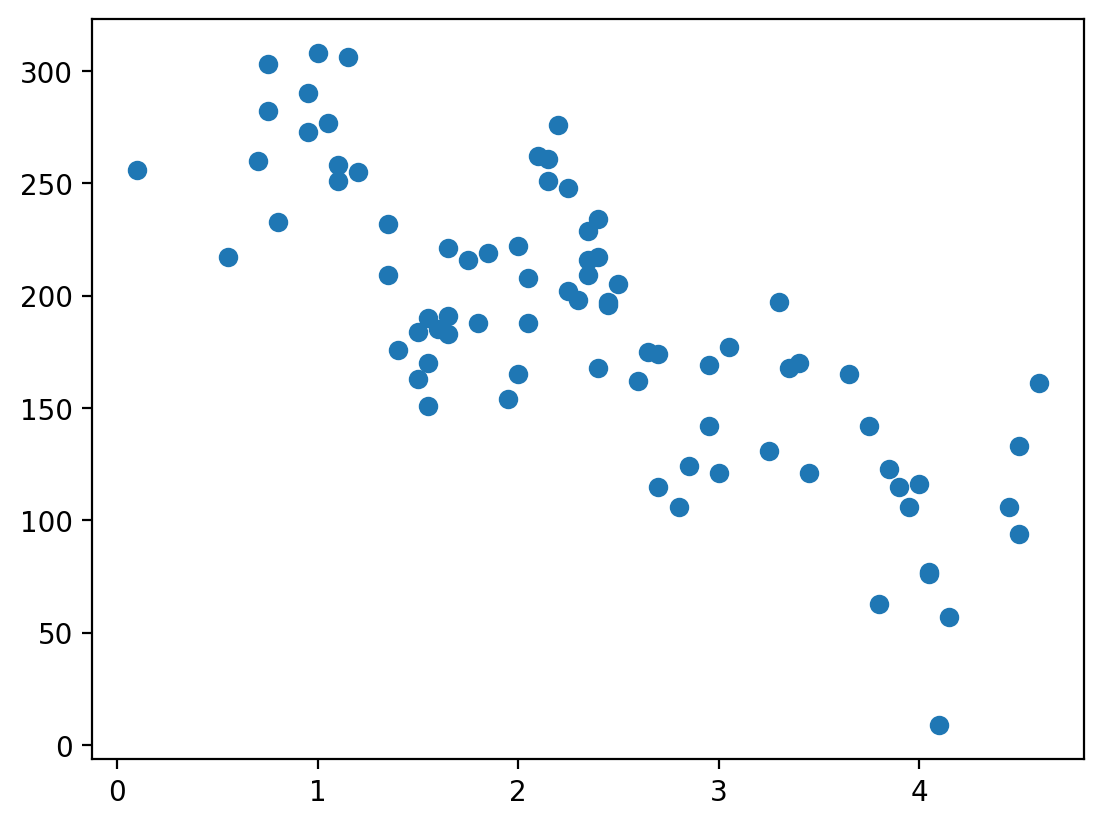

In [20]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [22]:
# 사용연수 짧은 맥북이 가격기 높다

### 상관계수 구해보기

In [25]:
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

In [27]:
# 대각선에 해당하는 (0, 0) 위치와 (1, 1) 위치는 각각 첫 번째 변수와
# 첫 번째 변수, 두 번째 변수와 두 번째 변수끼리의 상관계수를 
# 나타내기 때문에 항상 1
# (0, 1)과 (1, 0) 위치에는 첫 번째 변수와 두 번째 변수 간의 상관계수

In [28]:
# 약 0.79로 음의 상관 관계

## 3. "모델"을 만든다는 것, 그 의미 이해하기

In [31]:
# 사용연수 used_years 입력 -> 중고가격 얼마인지 예측

In [32]:
x = macbook["used_years"].values  # 입력
y = macbook["price"].values       # 출력
print("슝=3")

슝=3


In [33]:
def model(x, w, b):
    y = w * x + b
    return y
print("슝=3")

슝=3


In [34]:
model(x=5, w=2, b=1)

11

In [35]:
model(x=6, w=-20, b=140)

20

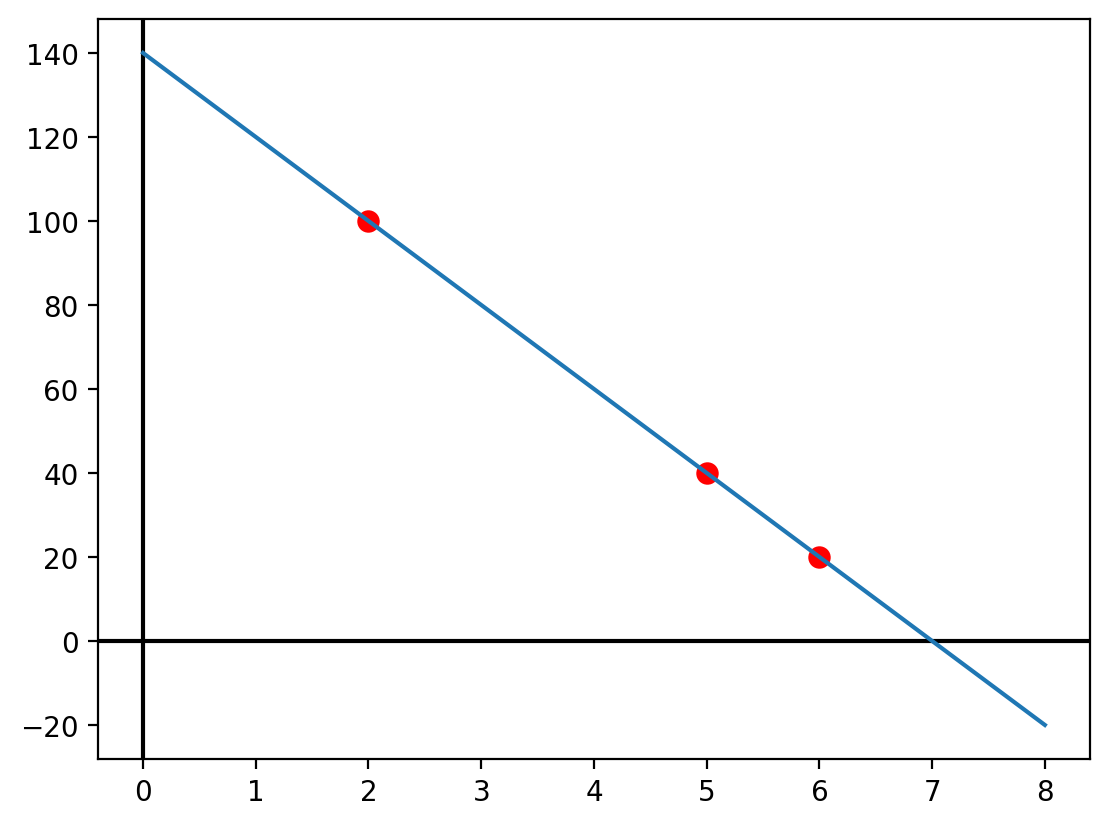

In [36]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

### 오차를 최소화하는 모델

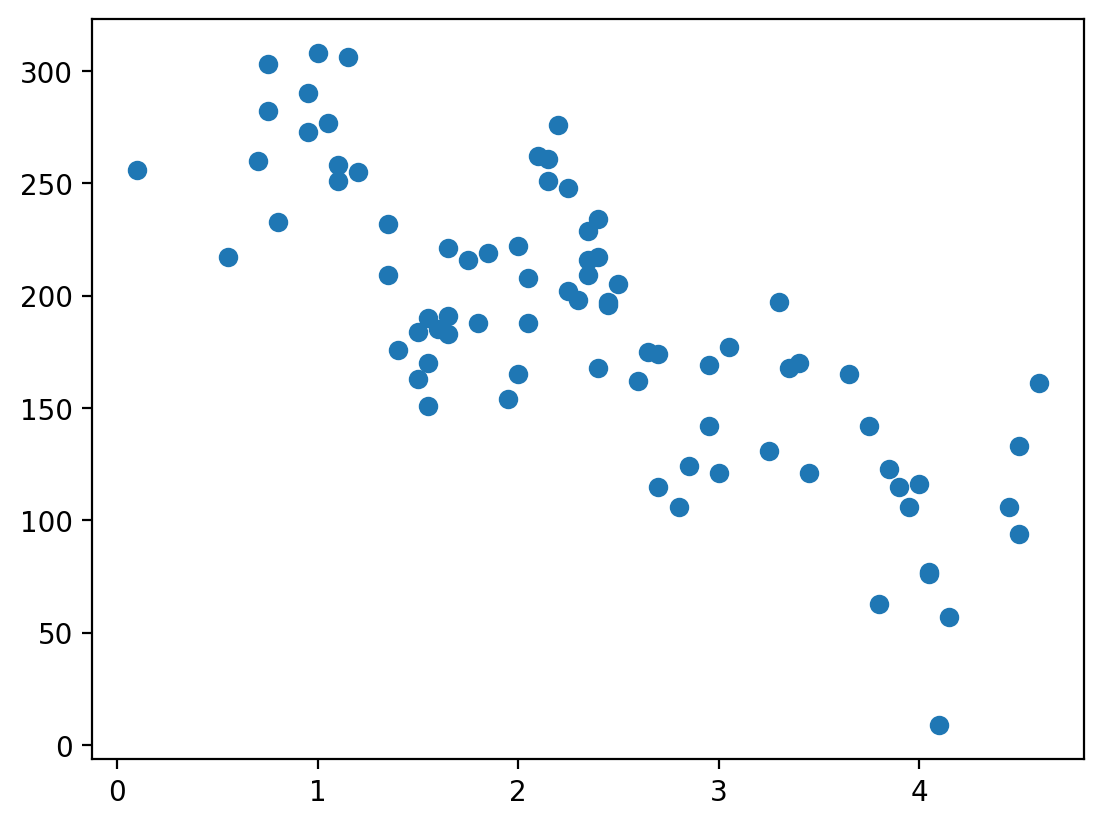

In [38]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [39]:
# 진짜 데이타로 실습

## 4. 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기

손실함수 : "아직 불완전한 현재의 모델이 출력하는 값과 실제 정답 간의 차이" 를 확인
먼저 1) 모델이 출력하는 값과 실제 정답 간의 차이를 계산하고, 2) 그 차이를 단계적으로 줄여나가는 순서로 모델을 학습

### 예시를 통해 이해하기

In [40]:
w = 3.1
b = 2.3
print("슝=3")

슝=3


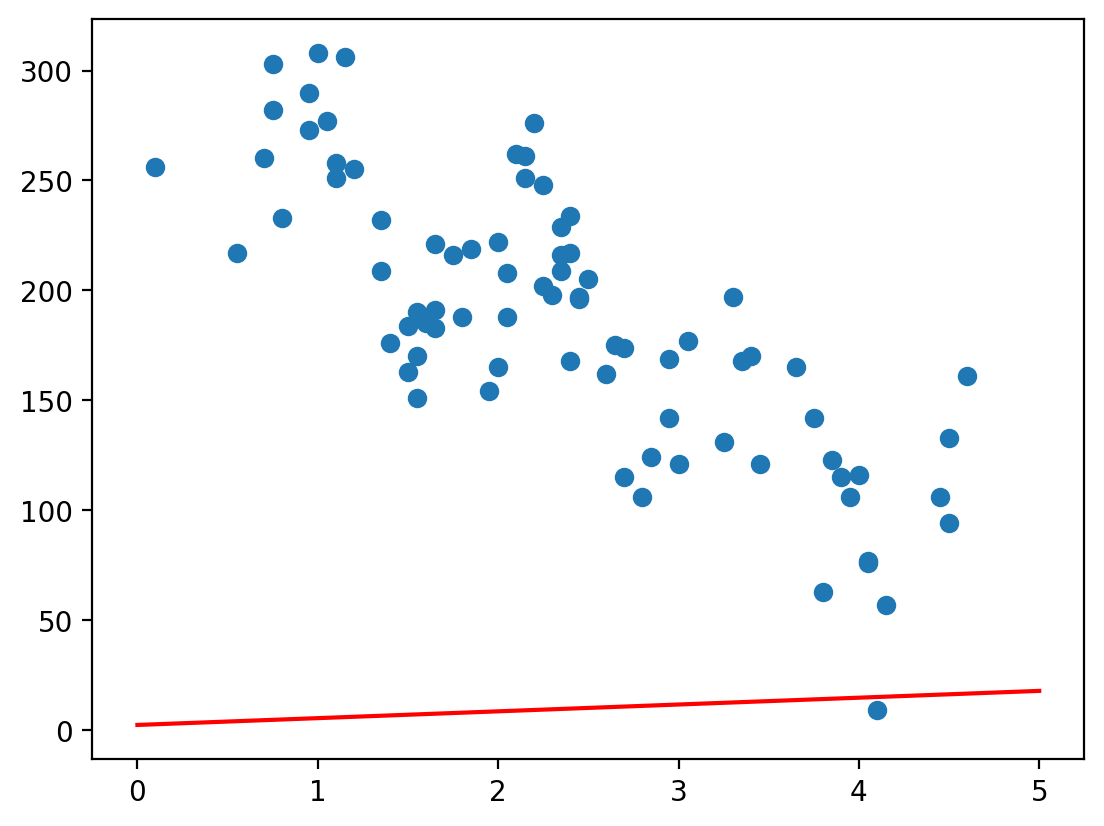

In [41]:
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [42]:
# y = 3.1x * 2.3 그래프 -> 정답하고 오차가 너무 큼

현재의 모델이 얼마나 틀린 답을 만들어내고 있는지를 확인

In [43]:
x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [44]:
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [45]:
macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [46]:
# price, prediction 큰 차이 존재

### 정답과 예측값 간의 차이

In [47]:
# price와 prediction의 차이인 error 컬럼 생성
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [48]:
# RMSE

In [49]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse
print("슝=3")

슝=3


In [50]:
# 모델의 RMSE 구하기

In [51]:
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [52]:
rmse = RMSE(predictions, y)
rmse

np.float64(188.81322969819274)

In [53]:
# 큰 오차 존재

### 손실함수(비용함수)

In [54]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
print("슝=3")

슝=3


## 5. 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지!

### 기울기와 경사하강법(Gradient Descent)

우리가 정말 원하는 것은 손실함수의 값이 0이 되는 것, 아니면 최소한 0에 가까운 작은 값이 되는 것을 바랍니다.
즉, 최적의 w는 빨간색으로 표시가 되어있는, 가장 작은 loss 값을 만들어내는 w 값이죠.

기울기를 활용해서 다음과 같은 규칙으로 w를 업데이트
1. 현재 w에서의 기울기를 구한다.
2. 기울기가 음수라면, 현재 w를 키운다.
3. 기울기가 양수라면, 현재 w를 줄인다.

기울기를 사용해서 점차적으로 매개변수를 업데이트 하는 방식을 Gradient Descent Method, 즉 경사하강법 

### 미분으로 경사 구하기

In [55]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db
print("슝=3")

슝=3


In [56]:
# Δx: 0.0001로

## 6. 한 번에 못해도 괜찮아, 정의된 손실함수와 기울기 함수로 모델을 학습시켜 최적화하기!

### 하이퍼 파라미터

모델이 스스로 학습해나가는 파라미터 가 아니라, 사람이 직접 사전에 정하고 시작해야 하는 파라미터 를 하이퍼 파라미터 라고 합니다.

In [58]:
LEARNING_RATE = 1  # 보통 학습률 0.0001 ~ 0.01 사용
print("슝=3")

슝=3


다음 순서대로 코드를 구현

1. 입력 데이터 x와 정답 데이터 y 준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
5. 계산된 gradient를 활용해서 w′ = w − ηg, b′ = b − ηg 로 업데이트
6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복
   

### 모델 최적화

In [59]:
# x, y 준비
x = macbook["used_years"].values
y = macbook["price"].values
print("슝=3")

슝=3


In [60]:
# 초기 가중치를 램던 값으로 설정
w = 3.1
b = 2.3
w, b

(3.1, 2.3)

In [62]:
# 손실함수 값 저장 losses 초기화
losses = []
print("슝=3")

슝=3


In [63]:
%%time
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038
CPU times: user 236 ms, sys: 9.9 ms, total: 246 ms
Wall time: 303 ms


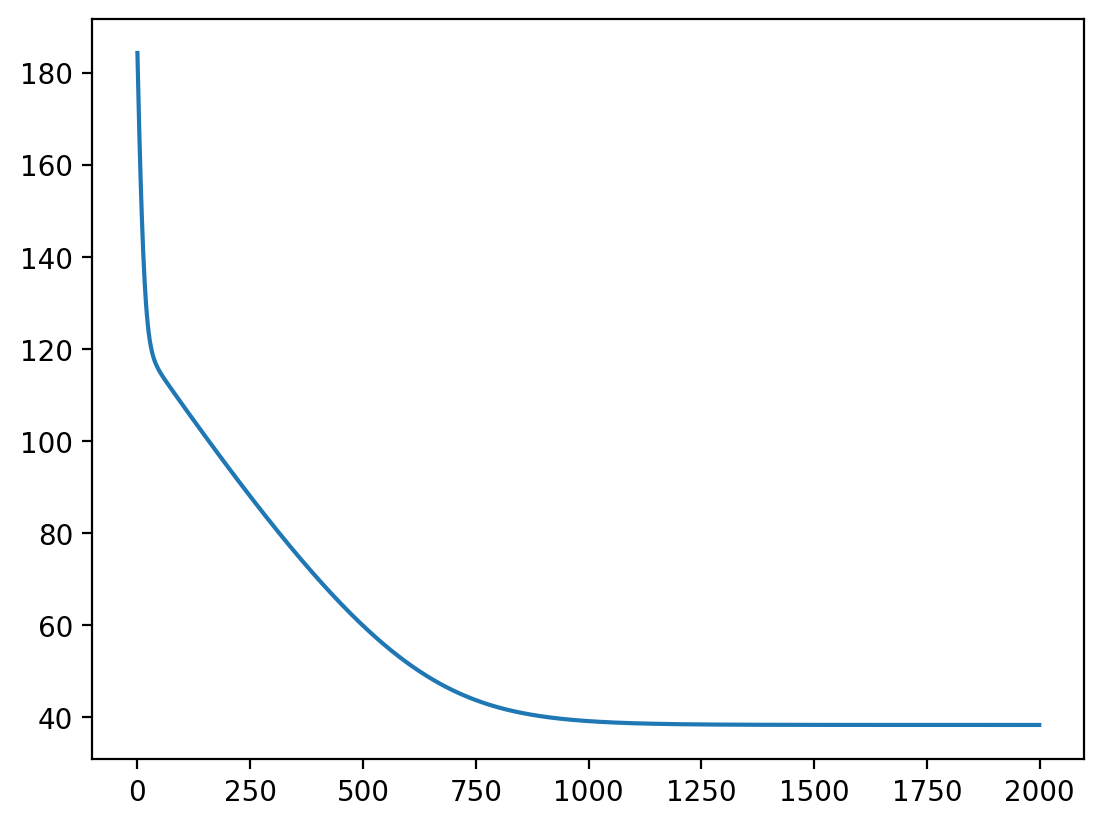

In [64]:
plt.plot(losses)
plt.show()

In [65]:
# w와 b 값 확인
w, b

(np.float64(-44.92756090768412), np.float64(293.0815786721102))

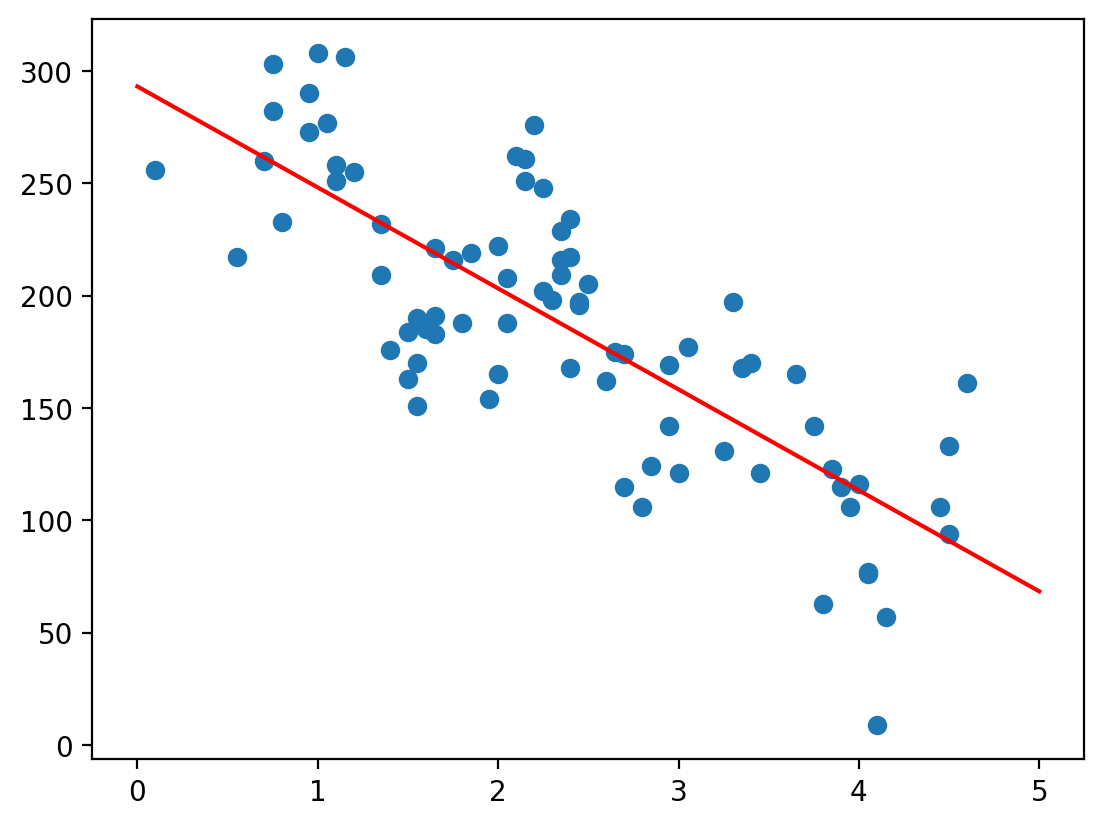

In [66]:
# 학습한 모델, 일차함수 그리기

# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)    # np.linspace(start, stop, num=50)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [67]:
# 새로운 데이터 macbook_test로 테스트

In [68]:
test_path = os.path.join(os.getenv('HOME'), 
'work/bike_regression/data/macbook_test.csv')
test = pd.read_csv(test_path)
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [69]:
test_x = test['used_years'].values
test_y = test['price'].values

In [70]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [71]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [72]:
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

np.float64(45.03918284717212)

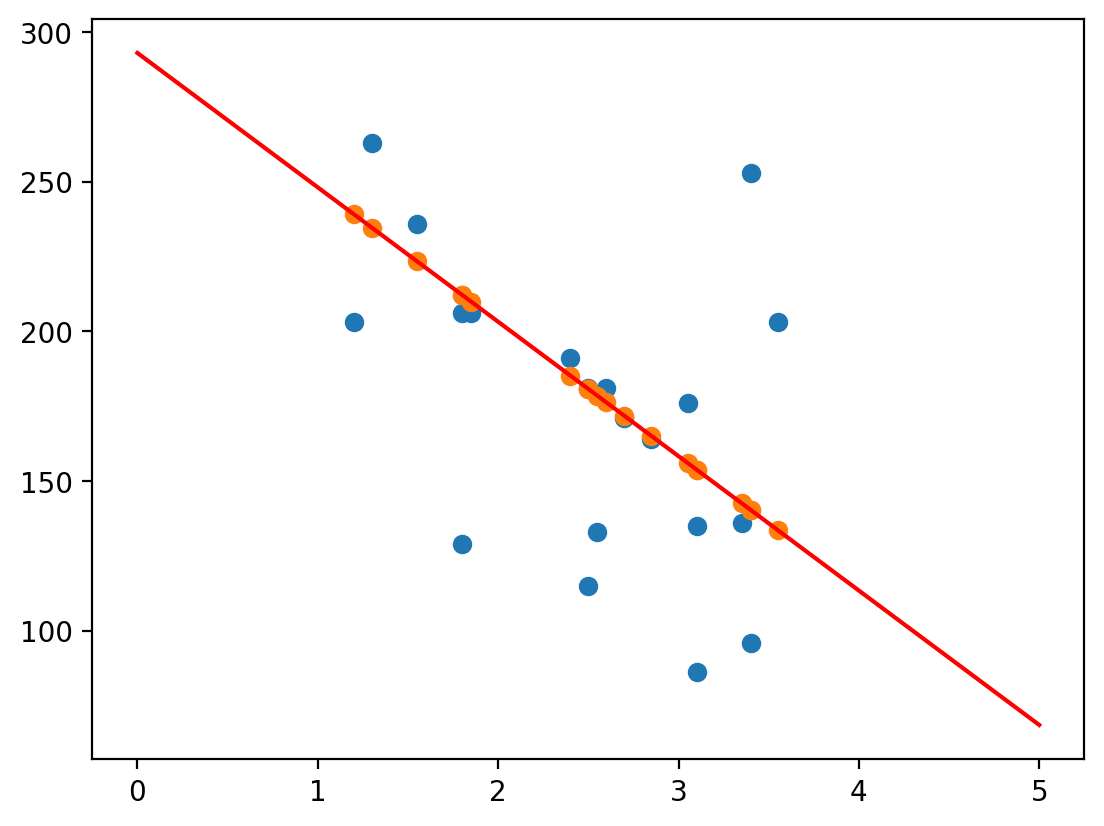

In [73]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

In [74]:
# 테스트 데이터에도 잘 적용됨

## 7. 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?

다변수 데이터에 대해 선형회귀를 하기 위한 데이터를 확인하고 모델 설계하기

seaborn 의 팁 데이터셋 활용

In [75]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [76]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
# 244행, 7열

각 컬럼 정보

- total_bill : 테이블의 전체 지불 금액
- tip : 팁으로 낸 금액
- sex : 계산한 손님의 성별
- smoker : 손님 중 흡연자 포함 여부
- day : 요일
- time : 시간
- size : 테이블 인원수

In [78]:
#  판다스의 get_dummies() 함수를 활용해 문자열 데이터에 대해서는 0, 1 로 변환

import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,False,True,False,True,False,False,False,True,False,True
1,10.34,1.66,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3.50,3,True,False,False,True,False,False,False,True,False,True
3,23.68,3.31,2,True,False,False,True,False,False,False,True,False,True
4,24.59,3.61,4,False,True,False,True,False,False,False,True,False,True


In [79]:
# 예측 항목 tip을 우측으로 

tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,False,True,False,True,False,False,False,True,False,True,1.01
1,10.34,3,True,False,False,True,False,False,False,True,False,True,1.66
2,21.01,3,True,False,False,True,False,False,False,True,False,True,3.50
3,23.68,2,True,False,False,True,False,False,False,True,False,True,3.31
4,24.59,4,False,True,False,True,False,False,False,True,False,True,3.61


In [80]:
tips.shape

(244, 13)

In [81]:
# 12가지 정보 + y (tip)

### 선형 회귀

선형 방정식 = 다변수 일차방정식

선형 방정식을 활용해서 원하는 값을 예측하는 모델을 설계하고 학습시키는 방법을 선형 회귀 라고 합니다.
선형 회귀는 선형 방정식 을 통해 회귀 문제를 푼다 는 의미가 담겨 있습니다.
이 중 특히 회귀 라는 단어는 연속된 실수값을 예측하는 문제 를 뜻합니다.

## 8. 다시 한 번 직접 설계해 보는 손실함수

In [83]:
# 데이터 준비
# X는 대문자로 표시, 백터

X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [84]:
# 데이타 분리 sklearn의 train_test_split 사용

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [102]:
X_train[:5]

array([[13.28, 2, True, False, False, True, False, False, True, False,
        False, True],
       [24.27, 2, True, False, True, False, False, False, True, False,
        False, True],
       [27.28, 2, True, False, True, False, False, True, False, False,
        False, True],
       [31.71, 4, True, False, False, True, False, False, False, True,
        False, True],
       [15.98, 2, True, False, False, True, True, False, False, False,
        True, False]], dtype=object)

In [98]:
y_train[:5]

array([2.72, 2.03, 4.  , 4.5 , 2.03])

In [85]:
# 임의의 W, b 준비

import numpy as np
W = np.random.rand(12)
b = np.random.rand()
print("슝=3")

슝=3


In [86]:
print(W)
print(b)

[0.86839329 0.62445156 0.75105235 0.96543281 0.21907367 0.83620307
 0.57932795 0.06310493 0.88173846 0.48724177 0.0301795  0.22011462]
0.4609006233578059


In [87]:
# 모델 준비

def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


In [88]:
predictions

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [103]:
predictions.shape

(80,)

In [104]:
# 손실함수로 MSE 사용

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [105]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


## 9. 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기

MSE Loss에 대해 미분 공식을 활용해서 직접 그래디언트 수식을 구하고 함수 구현하기

우리는 손실함수를 어떤 변수로 미분해야하나요? 다시 한 번 생각해 봅시다.

- 우리가 손실함수를 미분하는 이유는 최적의 매개변수, w와b에 가까워지는 방향을 알기 위함이었다.
- 특정 순간에 기울기가 양수라면 w를 더 작게 줄이고, 기울기가 음수라면 w를 더 크게 늘린다. 즉, 우리는 w′= w − ηg 공식을 활용해서 변수를 업데이트하는데, 이 때 기울기는 변수 업데이트의 방향을 결정하는 역할을 한다.
- 따라서 손실함수는 언제나 내가 최적을 찾고자 하는 매개변수, 혹은 가중치에 대해 미분해야 한다.
- 현재 모델에는 w1 부터 w12 까지 12개의 w 와, 1개의 b가 있으므로 우리는 총 13개의 변수에 대해 미분을 해야 한다.

In [106]:
# 함수 구현

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return np.array(dW, dtype=np.float64), db
print("슝=3")

슝=3


In [107]:
# 테스트

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)


dW: [857.24221962 103.57973435  24.68971711  12.23662453  14.34188033
  22.5844613    8.49562542   2.39056674  13.7281929   12.31195657
   9.02573827  27.90060336]
db: 36.92634163154929


In [108]:
dW.shape

(12,)

## 10. 모두 준비 되었다면, 모델 학습은 간단하다구!

직접 구현한 손실함수, 기울기 함수를 활용해 경사하강법으로 모델 학습하기

In [109]:
LEARNING_RATE = 0.0001

In [110]:
# 하이퍼파라메터 지정

In [111]:
%%time
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 51.9555
Iteration 20 : Loss 8.3885
Iteration 30 : Loss 2.9570
Iteration 40 : Loss 2.2770
Iteration 50 : Loss 2.1889
Iteration 60 : Loss 2.1746
Iteration 70 : Loss 2.1695
Iteration 80 : Loss 2.1656
Iteration 90 : Loss 2.1618
Iteration 100 : Loss 2.1581
Iteration 110 : Loss 2.1544
Iteration 120 : Loss 2.1506
Iteration 130 : Loss 2.1470
Iteration 140 : Loss 2.1433
Iteration 150 : Loss 2.1396
Iteration 160 : Loss 2.1360
Iteration 170 : Loss 2.1324
Iteration 180 : Loss 2.1287
Iteration 190 : Loss 2.1251
Iteration 200 : Loss 2.1216
Iteration 210 : Loss 2.1180
Iteration 220 : Loss 2.1144
Iteration 230 : Loss 2.1109
Iteration 240 : Loss 2.1074
Iteration 250 : Loss 2.1039
Iteration 260 : Loss 2.1004
Iteration 270 : Loss 2.0969
Iteration 280 : Loss 2.0934
Iteration 290 : Loss 2.0900
Iteration 300 : Loss 2.0865
Iteration 310 : Loss 2.0831
Iteration 320 : Loss 2.0797
Iteration 330 : Loss 2.0763
Iteration 340 : Loss 2.0729
Iteration 350 : Loss 2.0696
Iteration 360 : Loss 2.0662


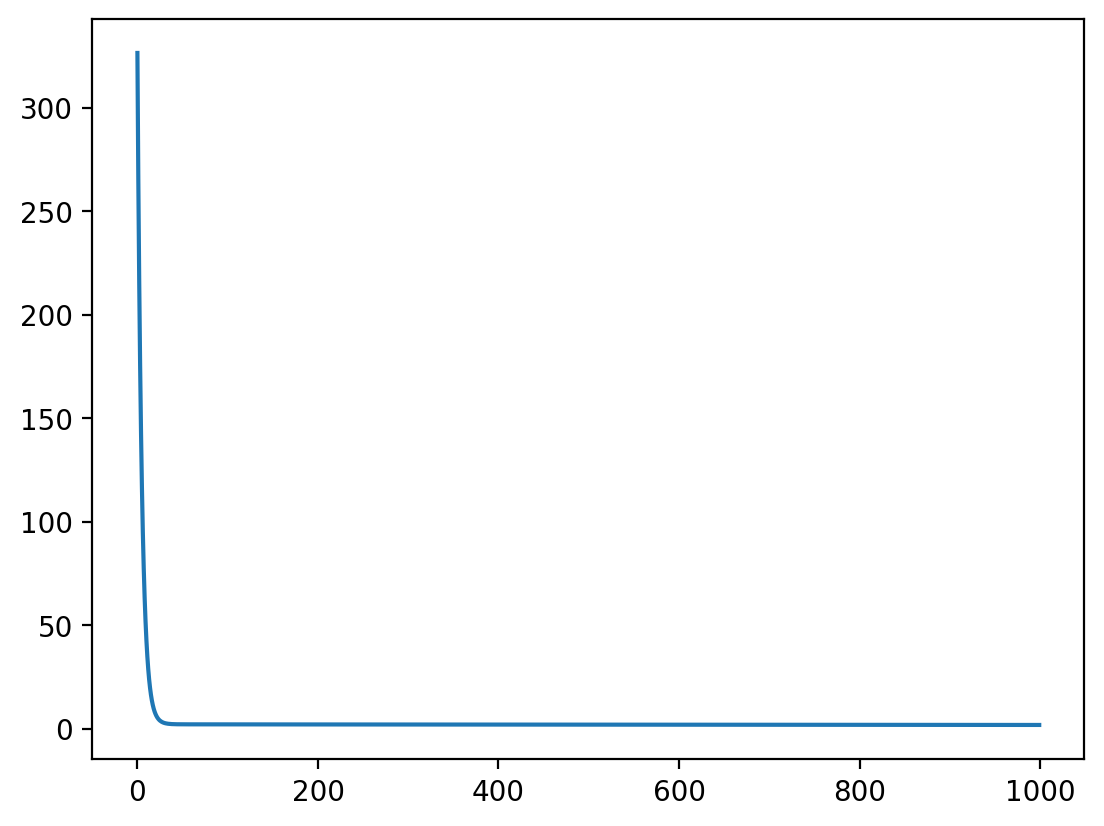

In [112]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [114]:
# 이상적 결과

In [113]:
W, b

(array([ 4.51339447e-04,  3.99896231e-01,  7.02027064e-01,  9.10231823e-01,
         2.08423230e-01,  7.42627228e-01,  5.46542512e-01,  6.53826621e-02,
         8.29190656e-01,  4.66071004e-01, -2.62396104e-03,  1.48691803e-01]),
 np.float64(0.35667434635020456))

In [115]:
# X_test, y_test 로 예측

In [116]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(1.7585632189873561)

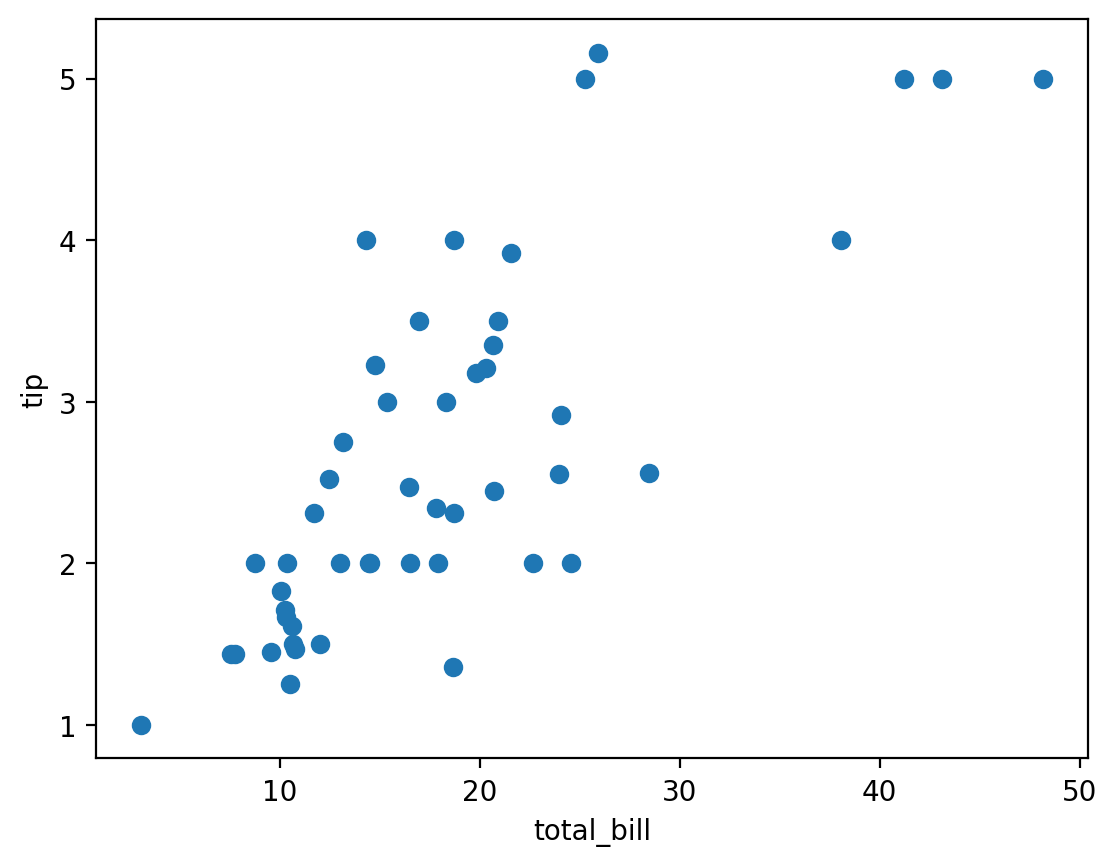

In [121]:
plt.scatter(X_test[:, 0], y_test)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

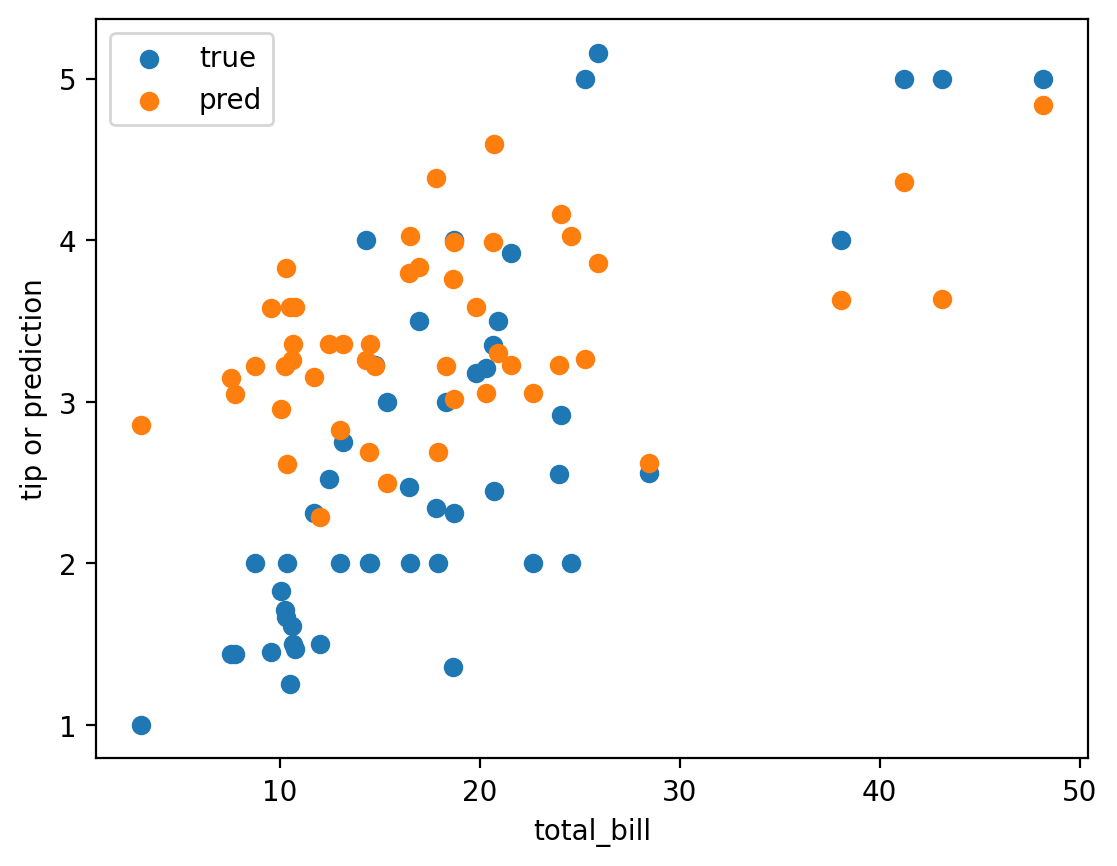

In [134]:
plt.scatter(X_test[:, 0], y_test, label = "true")
plt.scatter(X_test[:, 0], prediction, label = "pred")
plt.xlabel('total_bill')
plt.ylabel('tip or prediction')
plt.legend()
plt.show()

In [123]:
# 어느정도 예측이 정확함

## 11. 지금까지 한 모든 과정을, 라이브러리로 깔끔하게

sklearn 라이브러리 활용

In [124]:
# 데이타 준비

tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print("슝=3")

슝=3


In [125]:
# X, y 준비

X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [126]:
# train, test로 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


모델준비

In [127]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("슝=3")

슝=3


학습

In [128]:
%%time
model.fit(X_train, y_train)

CPU times: user 11.2 ms, sys: 561 μs, total: 11.8 ms
Wall time: 35.9 ms


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


X_test로 예측

In [129]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [130]:
predictions.shape

(49,)

모델 평가 (mse)

In [131]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

시각화

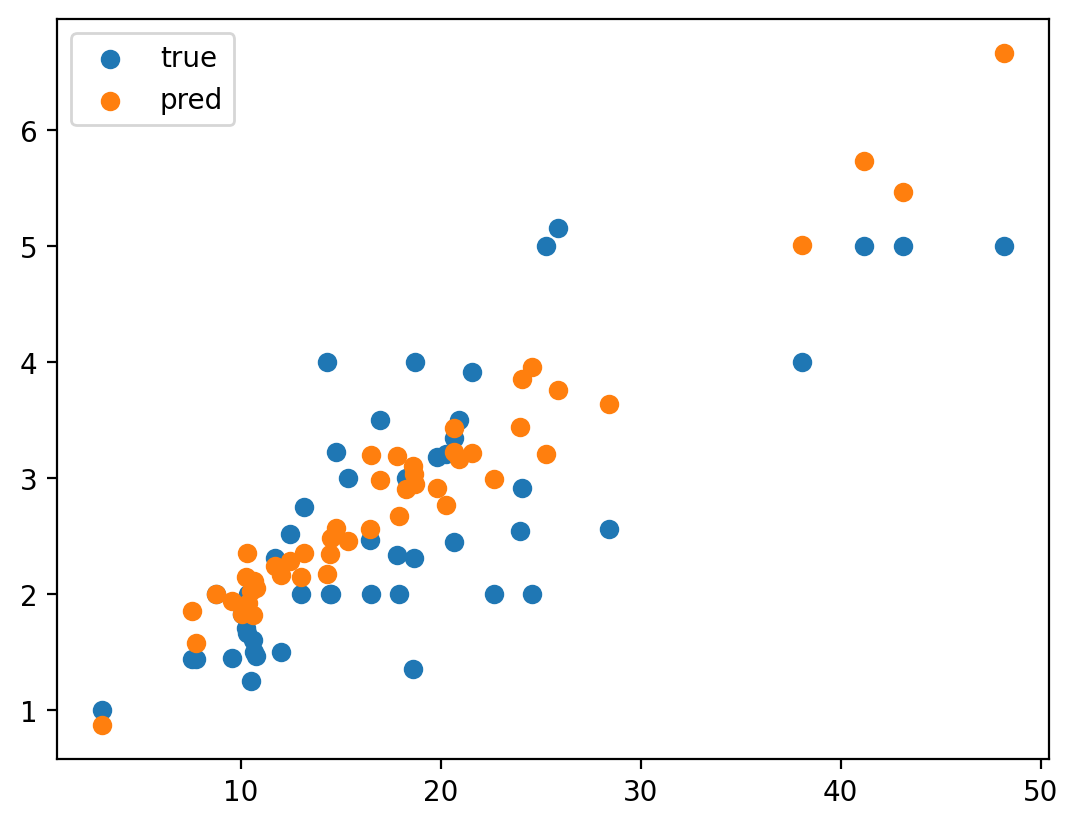

In [132]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()